<a href="https://colab.research.google.com/github/mondalso/HouseSalesInKingCountry/blob/main/KingCountyHousing_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **H20 AutoML House Sales in King County, USA Regression**




# Abstract

A lot of consideration and study must go into the major choice of a person's life—buying a home. One wants to purchase a home at the best price with the least amount of risk and with the expectation that it will be the best investment going forward. Home buyers may compare several residences that are for sale thanks to a number of internet resources, real estate professionals, and realtors. In addition to assisting the consumer in choosing the ideal time to buy a home, house price prediction may assist the developer in determining the selling price of a home. Three elements, including a house's physical state, design, and location, all have an impact on its price. The aim of the Notebook is to fit a linear model, a tree based model and use AutoML to find a best model and fit the data into the same. After fitting the model SHAP values are evaluated and interpretted. It may be concluded from the data analysis and test that the linear regression model can, to a certain extent, forecast and assess the housing price, but that the algorithm can still be improved using more sophisticated machine learning techniques.

# Dataset

The data set consists of :

13 associated characteristics of appointment no shows - PatientId, AppointmentID, Gender, DataMarcacaoConsulta, DataAgendamento, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received - The Independent Variables
The characteristic - No-show is a Dependent Variable.
There are a total of 110,527 observations in the dataset.

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a 
toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and 
design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Dataset : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# Importing required Libraries

In [1]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [4]:
#Importing the dataset
df = pd.read_csv("https://github.com/mondalso/HouseSalesInKingCountry/blob/main/kc_house_data.csv?raw=true", on_bad_lines='skip')

In [5]:
#Seperating dependent and independent variables
A = df.drop(['price'],axis=1)
B = df['price']

In [6]:
#Mean house price
print(f"Mean value of median house prices (in $ thousand): {round(B.mean(), 2)}")

Mean value of median house prices (in $ thousand): 540088.14


In [7]:
#Dropping date column, floors and sqft_above column
A=A.drop(['date'], axis=1)
A=A.drop(['floors'], axis=1)
A=A.drop(['id'], axis=1)


In [8]:
# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

Create a train/test split

In [9]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = tts(  # Splitting Data into Training and Test
    A, B, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

# Linear Regression

Fitting the data into Linear Regression model and interpreting the regression coefficients.

In [10]:
linear_model = LinearRegression()
linear_model.fit(A, B)
print('Linear Regression Coefficients:', linear_model.coef_)

Linear Regression Coefficients: [-3.58624750e+04  4.27180554e+04  1.09975271e+02  1.26635871e-01
  5.83070050e+05  5.29661288e+04  2.61382347e+04  9.62430582e+04
  7.23462358e+01  3.76290351e+01 -2.59079273e+03  2.01728703e+01
 -5.76689516e+02  6.04402094e+05 -2.16821559e+05  2.09672539e+01
 -3.87419677e-01]


In [11]:
#Accuracy of linear regression model
y_linear_predictions = linear_model.predict(x_test).round()
100 - percentage_change(y_test, y_linear_predictions)

74.29983143932296

In [12]:
# Print coefficients with variable names
coefficients = pd.DataFrame({
    'Variable': A.columns,
    'Coefficient': linear_model.coef_/10000
})
print(coefficients)

         Variable  Coefficient
0        bedrooms    -3.586248
1       bathrooms     4.271806
2     sqft_living     0.010998
3        sqft_lot     0.000013
4      waterfront    58.307005
5            view     5.296613
6       condition     2.613823
7           grade     9.624306
8      sqft_above     0.007235
9   sqft_basement     0.003763
10       yr_built    -0.259079
11   yr_renovated     0.002017
12        zipcode    -0.057669
13            lat    60.440209
14           long   -21.682156
15  sqft_living15     0.002097
16     sqft_lot15    -0.000039


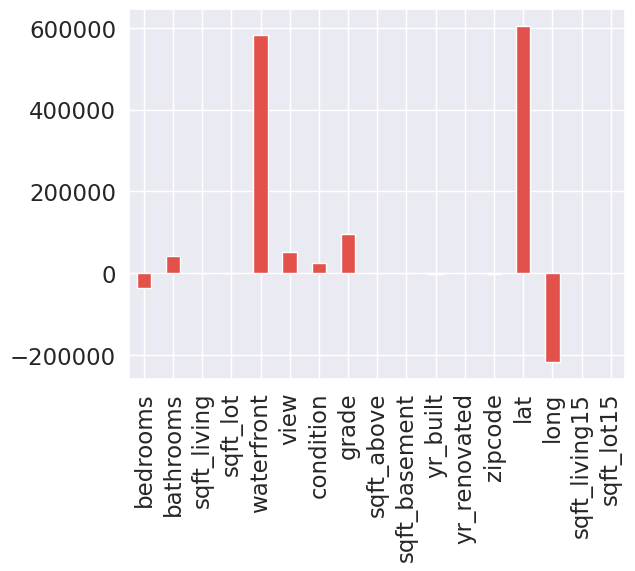

In [13]:
# Plot coefficients
coefficients = pd.Series(linear_model.coef_, index=A.columns)
coefficients.plot(kind='bar')
plt.show()

In a linear regression model, the coefficients represent the change in the target variable (i.e., the dependent variable) for a one-unit change in the predictor variable (i.e., the independent variable), while holding all other predictor variables constant. The interpretation of the coefficients depends on the scale of the target variable and the predictor variable.

For example, let's say we have a linear regression model to predict house prices based on their square footage and the number of bedrooms. The model can be written as:

Price = b0 + b1 * Square Footage + b2 * Bedrooms

Here, b0 is the intercept (i.e., the predicted house price when the square footage and number of bedrooms are both zero), b1 is the coefficient for square footage (i.e., the change in the house price for a one-unit increase in square footage, holding the number of bedrooms constant), and b2 is the coefficient for number of bedrooms (i.e., the change in the house price for a one-unit increase in the number of bedrooms, holding the square footage constant).

If b1 is positive, it means that as the square footage of the house increases, the predicted price also increases, holding the number of bedrooms constant. Similarly, if b2 is positive, it means that as the number of bedrooms increases, the predicted price also increases, holding the square footage constant.

The size of the coefficients indicates the magnitude of the effect. For example, if b1 is 100, it means that for every one-unit increase in square footage, the predicted price increases by 100 units, holding the number of bedrooms constant.

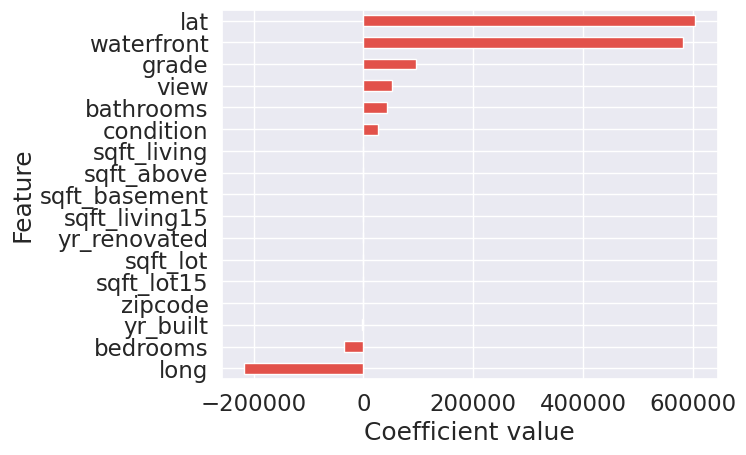

In [14]:
# Create horizontal bar chart of coefficients
coefficients = pd.Series(linear_model.coef_, index=A.columns)
coefficients.sort_values().plot(kind='barh')
plt.xlabel('Coefficient value')
plt.ylabel('Feature')
plt.show()

**As observed in the graph, the variables 'lat', 'waterfront', 'grade', 'view', 'bathrooms', 'condition' has positive coefficient. On the other hand 'yr_built', 'bedrooms', 'long' has negative coefficient.**

# Decision Tree Regression

Fitting the data into Decision Tree Regression model and interpretting the regression coefficients.

In [15]:
from sklearn.tree import DecisionTreeRegressor
# Fit a decision tree model
tree_model1 = DecisionTreeRegressor()
tree_model1.fit(A, B)
print('Decision Tree Model Nodes:', tree_model1.tree_.node_count)

Decision Tree Model Nodes: 41437


In [16]:
#Accuracy of Decision Tree Regression Model
y_tree_based_predictions1 = tree_model1.predict(x_test).round()
100 - percentage_change(y_test, y_tree_based_predictions1)

99.63763961132415

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Export the tree as text and print the rules for each node
r = export_text(tree_model1, feature_names=list(A.columns.values))
print(r)

|--- grade <= 8.50
|   |--- lat <= 47.53
|   |   |--- sqft_living <= 1938.00
|   |   |   |--- sqft_living <= 1442.00
|   |   |   |   |--- long <= -122.38
|   |   |   |   |   |--- view <= 1.50
|   |   |   |   |   |   |--- lat <= 47.45
|   |   |   |   |   |   |   |--- long <= -122.45
|   |   |   |   |   |   |   |   |--- yr_built <= 2004.50
|   |   |   |   |   |   |   |   |   |--- bathrooms <= 1.88
|   |   |   |   |   |   |   |   |   |   |--- condition <= 4.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- condition >  4.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- bathrooms >  1.88
|   |   |   |   |   |   |   |   |   |   |--- bedrooms <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [430000.00]
|   |   |   |   |   |   |   |   |   |   |--- bedrooms >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [410000.00]
| 

The rules tell us what conditions the tree uses to decide which path to take at each node.

The output is a text representation of the decision tree, with each node represented by a line that shows the splitting condition and the resulting prediction for that node. For example, a node might be split based on whether bathrooms is less than or equal to 6, and have a predicted value of 5300000.





# Random Forest Regression

Fitting the data into Random Forest Regression model and interpretting the regression coefficients.

In [18]:
from sklearn.ensemble import RandomForestRegressor

tree_model2 = RandomForestRegressor(
    max_depth=A.shape[1], random_state=0, n_estimators=10
)
tree_model2.fit(x_train, y_train)

RandomForestRegressor(max_depth=17, n_estimators=10, random_state=0)

In [19]:
y_tree_based_predictions2 = tree_model2.predict(x_test).round()
100 - percentage_change(y_test, y_tree_based_predictions2)

86.0824421523919

In [20]:
# Print the feature importances
importances = tree_model2.feature_importances_
for feature, importance in zip(list(A.columns.values), importances):
    print(f"{feature}: {importance:.3f}")

bedrooms: 0.003
bathrooms: 0.011
sqft_living: 0.260
sqft_lot: 0.015
waterfront: 0.035
view: 0.011
condition: 0.003
grade: 0.321
sqft_above: 0.020
sqft_basement: 0.005
yr_built: 0.028
yr_renovated: 0.006
zipcode: 0.015
lat: 0.160
long: 0.068
sqft_living15: 0.028
sqft_lot15: 0.013


In [21]:
# Print the rules for each tree in the forest
for i, tree in enumerate(tree_model2.estimators_):
    tree_rules = export_text(tree, feature_names=list(A.columns.values))
    print(f"Tree {i+1}:\n{tree_rules}")

Streaming output truncated to the last 5000 lines.
|   |   |   |   |   |   |   |   |   |   |--- value: [615000.00]
|   |   |   |   |   |   |   |--- bedrooms >  2.50
|   |   |   |   |   |   |   |   |--- value: [835000.00]
|   |   |   |   |   |--- sqft_above >  2239.00
|   |   |   |   |   |   |--- sqft_lot15 <= 14226.00
|   |   |   |   |   |   |   |--- sqft_living <= 2705.50
|   |   |   |   |   |   |   |   |--- long <= -122.05
|   |   |   |   |   |   |   |   |   |--- sqft_living15 <= 2009.50
|   |   |   |   |   |   |   |   |   |   |--- condition <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- condition >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- sqft_living15 >  2009.50
|   |   |   |   |   |   |   |   |   |   |--- lat <= 47.35
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   

Each tree is extracted from the random forest using the estimators_ attribute of the RandomForestRegressor object. The tree is then extracted as text and rules for each node is printed using the export_text function, just as the single decision tree regression model.

This way, the characteristics of the individual trees in the random forest is examined and we can gain insight into how the forest as a whole makes predictions.

Finding feature importance by running random forest model on xgb regressor.

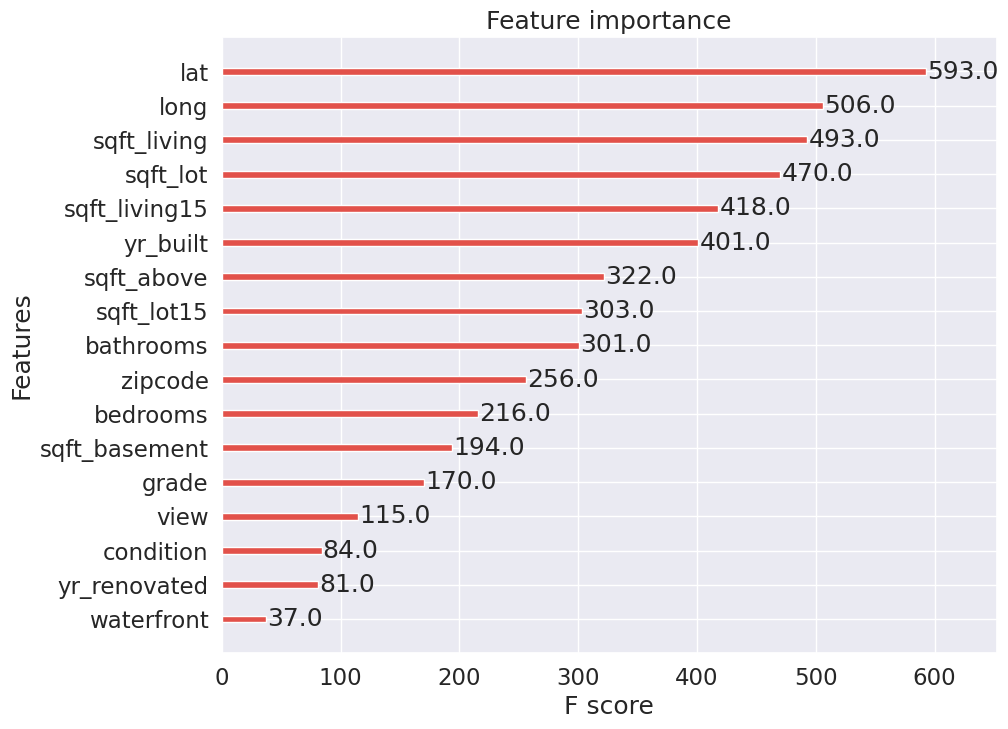

In [22]:
from xgboost import XGBRegressor
import xgboost as xgb

# Fit a random forest model using XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(A, B)

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(xgb_model, ax=ax)
plt.show()

Feature importance plot for Random forest model is as above.

# AutoML Regression

Running AutoML on the data to find out the best AutoML model.

In [23]:
#setting the run time, size and other params
min_mem_size=6 
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

6
Checking whether there is an H2O instance running at http://localhost:8500..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1oysxnzo
  JVM stdout: /tmp/tmp1oysxnzo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1oysxnzo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:8500
Connecting to H2O server at http://127.0.0.1:8500 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_pxatb9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [24]:
#importing the dataset
url = "https://github.com/mondalso/HouseSalesInKingCountry/blob/main/kc_house_data.csv?raw=true"
df = h2o.import_file(path = url)

# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])
X=df.columns
y_numeric = 'price'
X.remove(y_numeric) 

# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/12
# GBM base models (used / total),0/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [25]:
print(aml.leaderboard)  # Leaderbord of AutoML output

model_id                                                  rmse          mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20230330_34352     123720  1.53067e+10  68096.9  0.172502               1.53067e+10
StackedEnsemble_AllModels_1_AutoML_1_20230330_34352     126762  1.60687e+10  68203    0.172219               1.60687e+10
StackedEnsemble_BestOfFamily_2_AutoML_1_20230330_34352  130618  1.70611e+10  71277.5  0.177048               1.70611e+10
StackedEnsemble_BestOfFamily_3_AutoML_1_20230330_34352  131081  1.71821e+10  71358.4  0.177171               1.71821e+10
XGBoost_2_AutoML_1_20230330_34352                       133197  1.77414e+10  72512.4  0.181491               1.77414e+10
StackedEnsemble_BestOfFamily_1_AutoML_1_20230330_34352  134186  1.80059e+10  71628.1  0.178922               1.80059e+10
XGBoost_1_AutoML_1_20230330_34352                       136832  1.87231e+10  73985.2  0.185386               1.87231e+10
XGBoost_3_AutoML_1_20230330_3435

In [26]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df1=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_AllModels_2_AutoML_1_20230330_34352': 0,
 'StackedEnsemble_AllModels_1_AutoML_1_20230330_34352': 1,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230330_34352': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230330_34352': 3,
 'XGBoost_2_AutoML_1_20230330_34352': 4,
 'GLM_1_AutoML_1_20230330_34352': 18}

In [27]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])

4


In [28]:
#print best model name
best_model1.algo

'xgboost'

In [29]:
#fit the data to the best model
autoML_best_predictions = best_model1.predict(df_test).round()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


xgboost is the best model according to autoML.


# SHAP Analysis

### **SHAP Analysis for Linear Regression Model**

This graph displays the importance of various features in an ML model for predicting housing prices. 

*   Each dot on the chart represents a housing feature
*   Features are listed in descending order of importance
*   Red indicating high values
*   Blue indicating low values
*   If a dot is on the right side of the y-axis, it had a positive impact
*   If a dot is on the left side of the y-axis indicated a negative impact.
*   The position of a dot on the x-axis represents the intensity of impact, with greater distance indicating greater intensity.

This type of visualization is helpful in interpreting how the ML model is functioning and which features are the most important for predicting housing prices.







Permutation explainer: 101it [00:10,  2.05s/it]                         


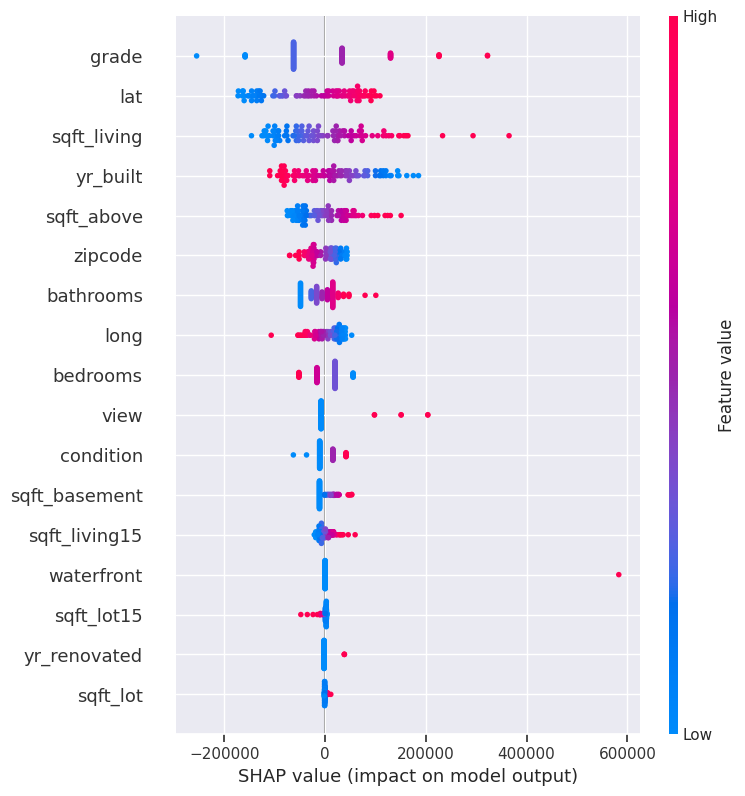

In [30]:
# Run SHAP analysis on the linear model
explainer_linear = shap.Explainer(linear_model.predict, A)
shap_values_linear = explainer_linear(A[:100])
shap.summary_plot(shap_values_linear, A[:100])

Some findings from the chart include: 

*   higher the grade, higher will the price be
*   lower the yr_built, higher will the price be
*   higher the latitude, higher will the price be
*   lower the longitude, higher will the price be

#### Feature Importance

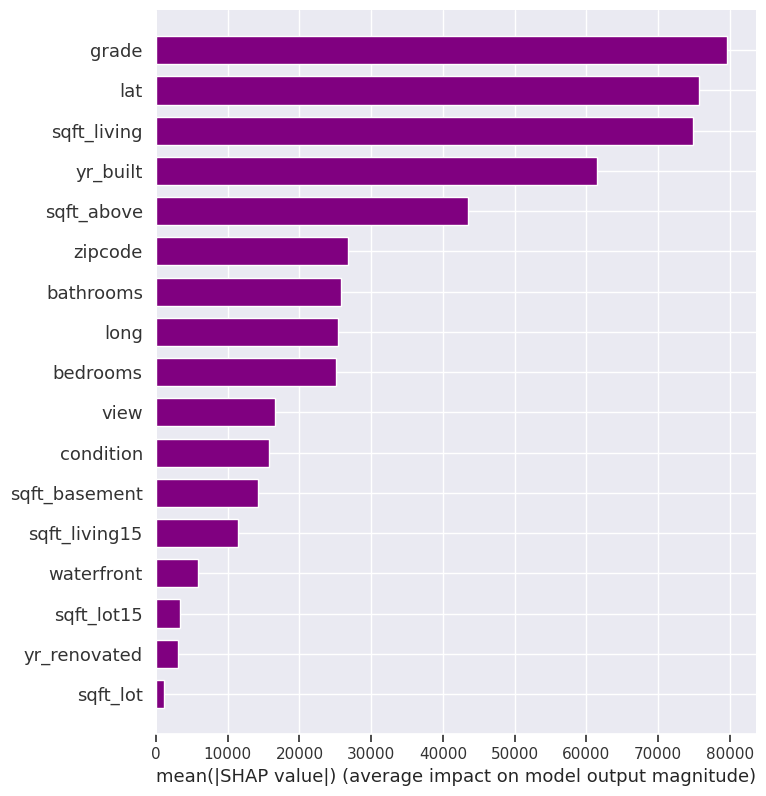

In [31]:
# SHAP variable importance for a Linear Model
shap.summary_plot(shap_values_linear, x_train, plot_type="bar", color="purple")

The concept underlying SHAP feature importance is straightforward: Features that exhibit high absolute Shapley values are deemed important. To obtain a comprehensive understanding of importance, we calculate the mean absolute Shapley value for each feature across the dataset. We then arrange the features in descending order of importance and illustrate them on a graph.

The graph presented depicts the SHAP feature importance plot for a Linear Regression model. By analyzing this plot, we can deduce that grade is the most critical feature, succeeded by lat and sqft_living.

#### Waterfall Plot

In [40]:
# Waterfall plot for linear model
def get_SHAP(index=17):
    shap.plots.waterfall(shap_values_linear[index], max_display=14)

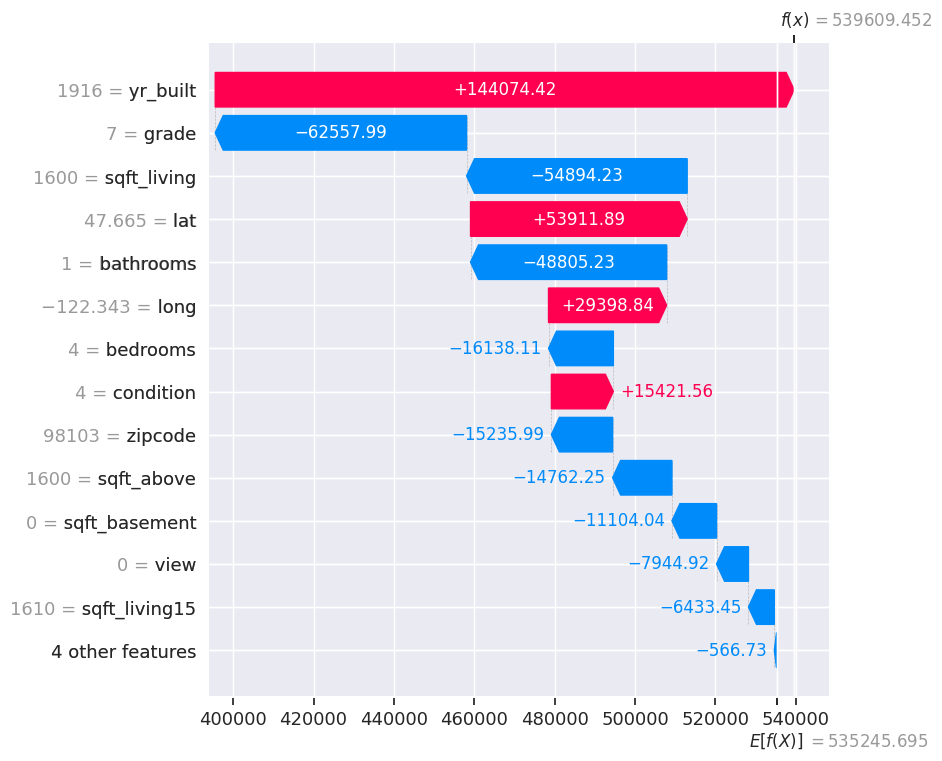

In [41]:
get_SHAP()

It says that **f(x) = 539609** is what we got as a model output and the **expected output** for this sample was **535245**. We came pretty close to determining it as the difference is not much. The waterfall model explains how we got the expected output, and which features contributed to what. The graph shows that **yr_built has the biggest and most positive impact** in increasing the price of the house by 126154 for this specific sample. Followed by **grade that had a negative impact** and it bought the price of the house down again by 60130 for this sample, and so on. Using this model we can visually interpret why exactly this specific sample is giving an output of 539609.

### **SHAP Analysis for Decision Tree Regression Model**

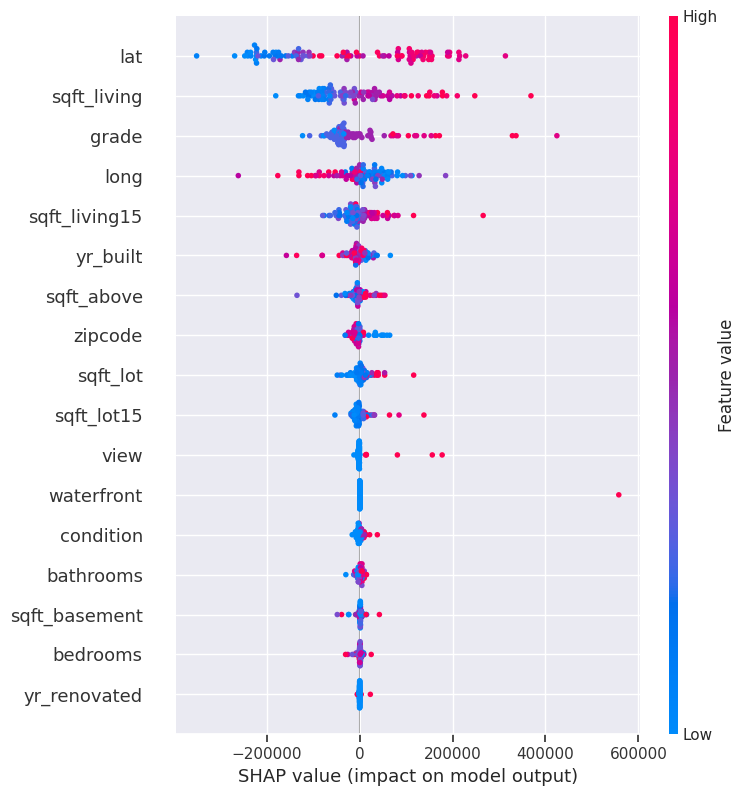

In [34]:
# Run SHAP analysis on the decision tree model
explainer_decision_tree = shap.Explainer(tree_model1.predict, A)
shap_values_decision_tree = explainer_decision_tree(A[:100])
shap.summary_plot(shap_values_decision_tree, A[:100])

#### Waterfall Plot

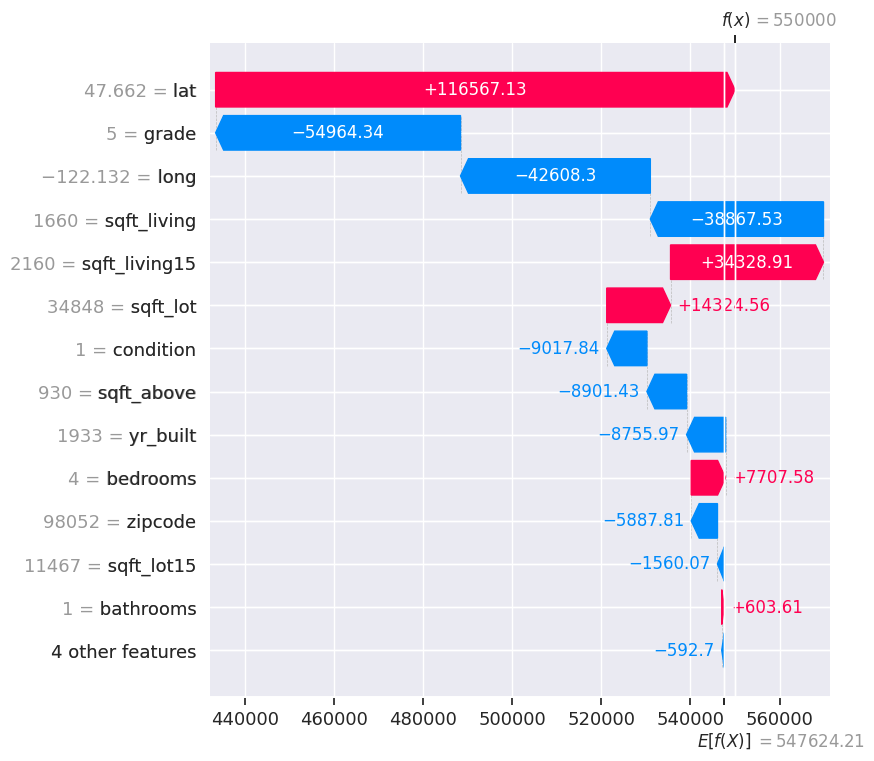

In [35]:
# Waterfall plot for decision tree regression model
def get_SHAP(index=36):
    shap.plots.waterfall(shap_values_decision_tree[index], max_display=14)

get_SHAP()

It says that **f(x) = 550000** is what we got as a model output and the **expected output** for this sample was **547624**. The graph shows that **lat has the biggest and most positive impact** in increasing the price of the house by 123303 for this specific sample. Followed by **grade that had a negative impact** and it bought the price of the house down again by 41612 for this sample, and so on. Using this model we can visually interpret why exactly this specific sample is giving an output of 550000.

### **SHAP Analysis for Random Forest Regression Model**

Permutation explainer: 101it [00:15,  2.08it/s]


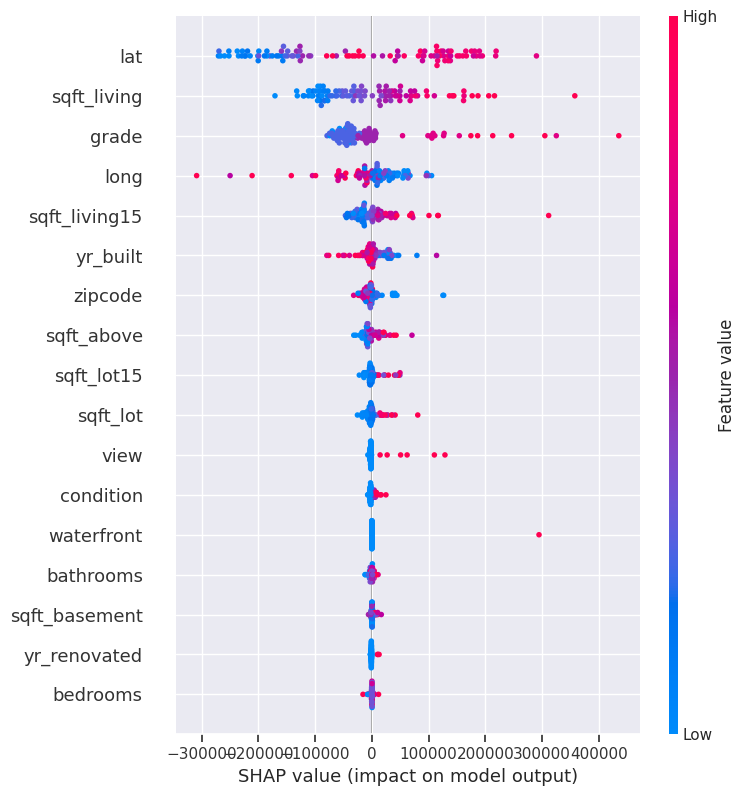

In [36]:
# Run SHAP analysis on the random forest model
explainer_random_forest = shap.Explainer(tree_model2.predict, A)
shap_values_random_forest = explainer_random_forest(A[:100])
shap.summary_plot(shap_values_random_forest, A[:100])

#### Waterfall Plot

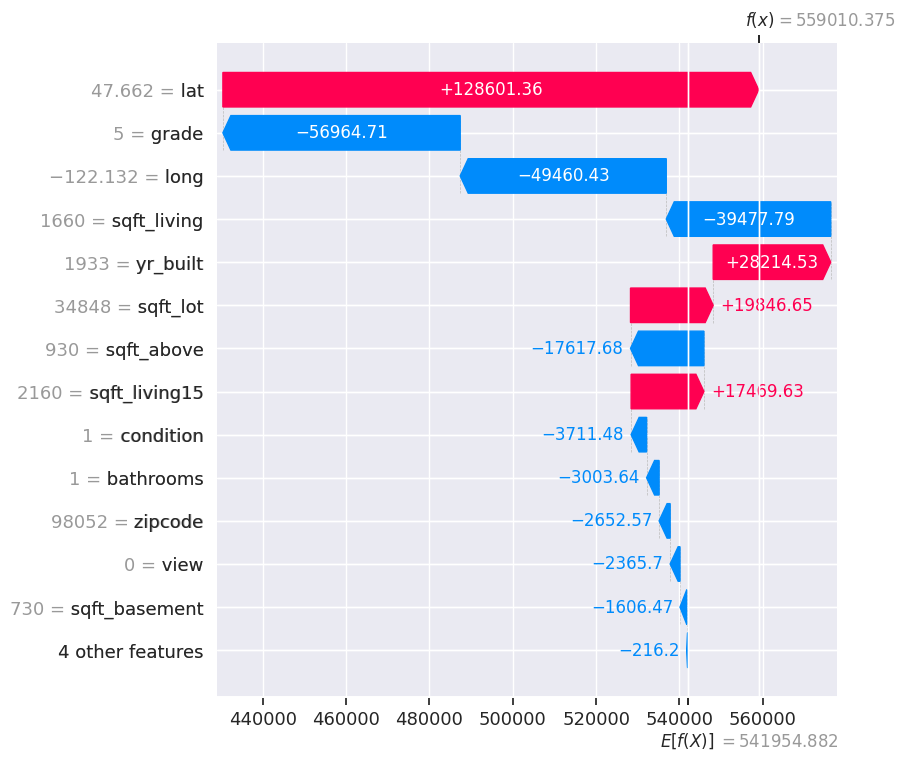

In [37]:
# Waterfall plot for random forest regression model
def get_SHAP(index=36):
    shap.plots.waterfall(shap_values_random_forest[index], max_display=14)

get_SHAP()

It says that **f(x) = 559010** is what we got as a model output and the **expected output** for this sample was **541954**. The graph shows that **lat has the biggest and most positive impact** in increasing the price of the house by 125487 for this specific sample. Followed by **grade that had a negative impact** and it bought the price of the house down again by 59039 for this sample, and so on. Using this model we can visually interpret why exactly this specific sample is giving an output of 541954.

# Conclusion


Different ML models, namely Linear Regression, Decision Tree Regression, Random Forest Regression and AutoML were used to fit the data to predict housing prices from the dataset of House Sales in King County, USA. SHAP Analysis was performed on each of these models and compared with other interpretability techniques. Coefficients were analysed in the Linear Regression model. Nodes were analysed in the tree based models. Best AutoML model was derives using AutoML H2O libraries.

# LICENSE
LICENSE

Copyright <2022> Sonali Mondal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Reference

[1]https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Full_ML_Report/Wine-Quality-Analysis.ipynb

[2]https://www.kaggle.com/code/washingtongold/king-county-house-sales-analysis

[3]https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

[4]https://www.geeksforgeeks.org/random-forest-regression-in-python/


